In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Control Group vs Experimental Group
Always normality rejected in at least one of both groups

In [2]:
p_values = {}

p_values["interval"] = {"ranksum":0.48,
                       "median":0.35}

p_values["stars"] = {"ranksum":0.77,
                       "median":0.95}

p_values["score"] = {"ranksum":0.05,
                       "median":0.08}

p_values["clippy"] = {"ranksum":0.93,
                       "median":0.86}

p_values["block_try_counter"] = {"ranksum":0.20,
                       "median":0.20}

p_values

{'interval': {'ranksum': 0.48, 'median': 0.35},
 'stars': {'ranksum': 0.77, 'median': 0.95},
 'score': {'ranksum': 0.05, 'median': 0.08},
 'clippy': {'ranksum': 0.93, 'median': 0.86},
 'block_try_counter': {'ranksum': 0.2, 'median': 0.2}}

# Switched vs Not Switched
Always normality rejected in at least one of both groups

In [3]:
p_values_sns = {}

p_values_sns["interval"] = {"ranksum":0.87,
                       "median":0.62}

p_values_sns["stars"] = {"ranksum":0.23,
                       "median":0.66}

p_values_sns["score"] = {"ranksum":0.02,
                       "median":0.05}

p_values_sns["clippy"] = {"ranksum":0.26,
                       "median":0.42}

p_values_sns["block_try_counter"] = {"ranksum":0.01,
                       "median":0.01}

p_values_sns

{'interval': {'ranksum': 0.87, 'median': 0.62},
 'stars': {'ranksum': 0.23, 'median': 0.66},
 'score': {'ranksum': 0.02, 'median': 0.05},
 'clippy': {'ranksum': 0.26, 'median': 0.42},
 'block_try_counter': {'ranksum': 0.01, 'median': 0.01}}

In [4]:
def plot_sign(results):
    color1 = '#F79E02'
    color2 = '#0074E1'
    
    combined_df = pd.DataFrame(results).transpose()
    combined_df.plot(kind="bar", title="p-values per variable", color=[color1,color2])
    plt.ylabel("p-value")
    plt.ylim([0,1])
    plt.xticks(rotation=45,horizontalalignment="center")
    plt.hlines(0.05,-10,5, color="#000000")
    



# Plotting and making tables

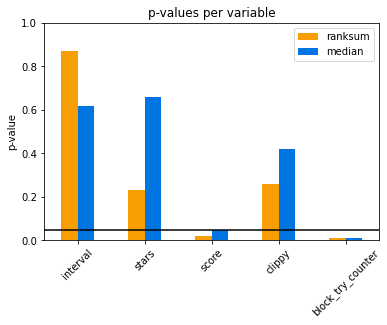

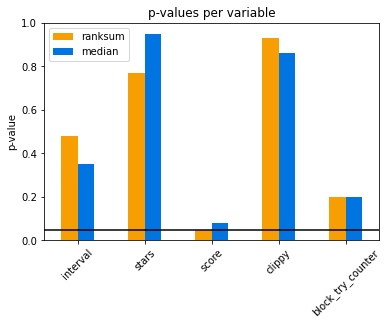

In [5]:
plot_sign(p_values_sns)
plot_sign(p_values)

In [7]:
c_e = pd.DataFrame(p_values).transpose().rename(columns={"ranksum":"ranksum_ce","median":"median_ce"})
sns = pd.DataFrame(p_values_sns).transpose().rename(columns={"ranksum":"ranksum_sns","median":"median_sns"})

results = pd.merge(c_e,sns, left_index=True,right_index=True)
print(results.to_latex())

results

\begin{tabular}{lrrrr}
\toprule
{} &  ranksum\_ce &  median\_ce &  ranksum\_sns &  median\_sns \\
\midrule
interval          &        0.48 &       0.35 &         0.87 &        0.62 \\
stars             &        0.77 &       0.95 &         0.23 &        0.66 \\
score             &        0.05 &       0.08 &         0.02 &        0.05 \\
clippy            &        0.93 &       0.86 &         0.26 &        0.42 \\
block\_try\_counter &        0.20 &       0.20 &         0.01 &        0.01 \\
\bottomrule
\end{tabular}



,ranksum_ce,median_ce,ranksum_sns,median_sns
interval,0.48,0.35,0.87,0.62
stars,0.77,0.95,0.23,0.66
score,0.05,0.08,0.02,0.05
clippy,0.93,0.86,0.26,0.42
block_try_counter,0.20,0.20,0.01,0.01


## Comparing Groups

In [165]:
control_and_experimental = pd.read_csv("control_vs_experimental.csv", sep=',')
switched_vs_not_switched = pd.read_csv("switched_vs_not_switched.csv", sep=',')

In [166]:
switched_vs_not_switched.groupby('group').mean().transpose()

group,not_switched,switched
Unnamed: 0,241.000000,78.500000
id,125637.801694,118705.849897
interval,53.040013,53.747608
stars,0.911510,1.006825
score,0.571178,0.536027
clippy,0.023621,0.034264
block_try_counter,1.190178,1.289963


In [167]:
switched_vs_not_switched.groupby('group').median().transpose()

group,not_switched,switched
Unnamed: 0,241.000000,78.500000
id,138658.333333,129294.115870
interval,54.714286,49.385095
stars,0.500000,0.874133
score,0.574434,0.514286
clippy,0.000000,0.000000
block_try_counter,1.015120,1.058538


In [168]:
control_and_experimental.groupby('group').mean().transpose()

group,control,experimental
Unnamed: 0,250.000000,87.500000
id,123552.123397,121180.515797
interval,54.733221,52.241786
stars,0.951519,0.960646
score,0.572872,0.538200
clippy,0.026475,0.030760
block_try_counter,1.154220,1.310199


In [169]:
control_and_experimental.groupby('group').median().transpose()
# control_and_experimental.groupby('group').median().transpose().plot.bar()

group,control,experimental
Unnamed: 0,250.000000,87.500000
id,131089.000000,131085.923302
interval,55.000000,48.725000
stars,0.835888,0.707045
score,0.574434,0.524746
clippy,0.000000,0.000000
block_try_counter,1.023740,1.050000


# Over Time

In [170]:
print(len(switched_vs_not_switched))
switched_vs_not_switched['datetime'].min(),switched_vs_not_switched['datetime'].max()


325


('2021-10-20 13:01:18', '2021-11-16 21:09:04')

In [171]:
switched_vs_not_switched['score']

0      0.611454
1      0.497222
2      0.399629
3      0.714286
4      0.555556
         ...   
320    0.680303
321    0.409494
322    0.542604
323    0.677629
324    0.648730
Name: score, Length: 325, dtype: float64

In [172]:
switched_vs_not_switched

,Unnamed: 0,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime,group
0,0,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.000000,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24,switched
1,1,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.000000,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29,switched
2,2,2021-11-01 13:09:49,89089.914530,81.000545,NaN,0.399629,0.000000,1.223312,8dc6bc06-26a7-4b34-8960-ec3f64a04612,2021-11-01 13:09:49,switched
3,3,2021-10-20 13:45:12,18439.487805,87.857143,NaN,0.714286,0.000000,1.000000,4fe7685f-6e91-4cca-aacc-0908dd55478a,2021-10-20 13:45:12,switched
4,4,2021-10-21 09:06:52,34756.343949,54.000000,NaN,0.555556,0.111111,1.000000,2169f104-8006-46cf-8cd0-8aaf0c14c65c,2021-10-21 09:06:52,switched
...,...,...,...,...,...,...,...,...,...,...,...
320,320,2021-11-16 16:58:40,241148.954545,5.471591,0.000000,0.680303,0.000000,1.000000,6ad4badc-3dd1-4c4e-b8a2-a601877ce586,2021-11-16 16:58:40,not_switched
321,321,2021-11-10 14:06:44,190317.903720,25.195967,2.000000,0.409494,0.000000,1.035636,593ae9d4-e9ab-41e8-8d56-e152bebdef6d,2021-11-10 14:06:44,not_switched
322,322,2021-11-12 13:14:13,203826.500000,77.342857,1.000000,0.542604,0.000000,1.171429,838c4e69-f68b-47d3-aa07-48e2f4b3f721,2021-11-12 13:14:13,not_switched
323,323,2021-11-12 13:35:38,206948.575480,54.757823,0.500000,0.677629,0.000000,1.059957,838c4e69-f68b-47d3-aa07-48e2f4b3f721,2021-11-12 13:35:38,not_switched


In [173]:
switched_vs_not_switched.set_index('timestamp',inplace=True)


In [222]:
Moving_av = switched_vs_not_switched.rolling(window=10).mean()
Moving_av['group'] = switched_vs_not_switched['group']

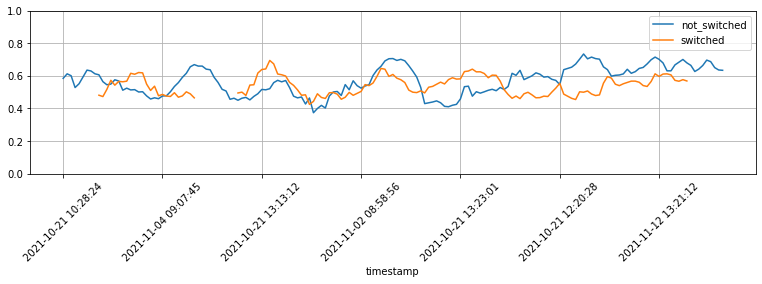

In [239]:
Moving_av.groupby('group')['score'].plot(legend=True);
plt.xticks(fontsize=10,rotation=45);
plt.grid()
plt.ylim(0,1)
plt.savefig("score_over_time.png")

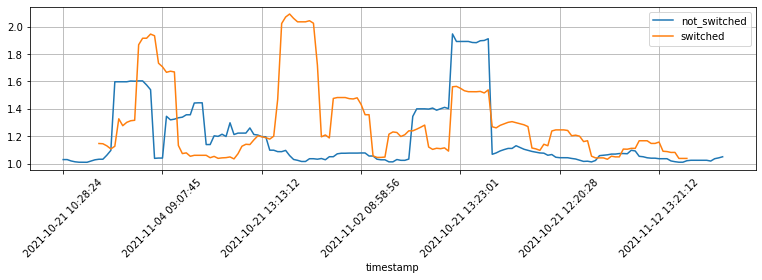

In [242]:
Moving_av.groupby('group')['block_try_counter'].plot(legend=True);
plt.xticks(fontsize=10,rotation=45);
plt.grid()

plt.savefig("btc_over_time.png")

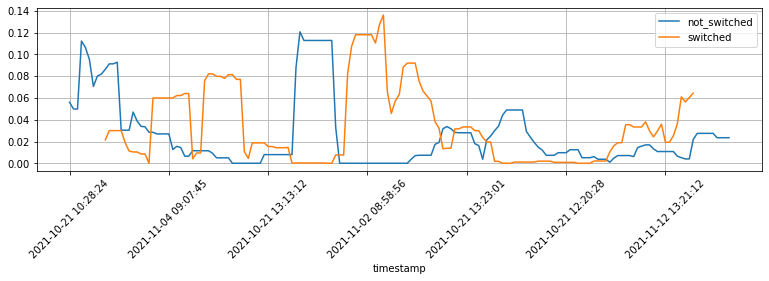

In [244]:
Moving_av.groupby('group')['clippy'].plot(legend=True);
plt.xticks(fontsize=10,rotation=30);
plt.xticks(fontsize=10,rotation=45);
plt.grid()
plt.savefig("clippy_over_time.png")

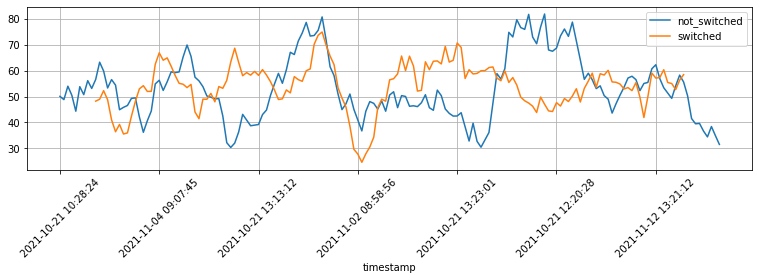

In [245]:
Moving_av.groupby('group')['interval'].plot(legend=True);
plt.xticks(fontsize=10,rotation=30);
plt.savefig("interval_over_time.png")
plt.xticks(fontsize=10,rotation=45);
plt.grid()


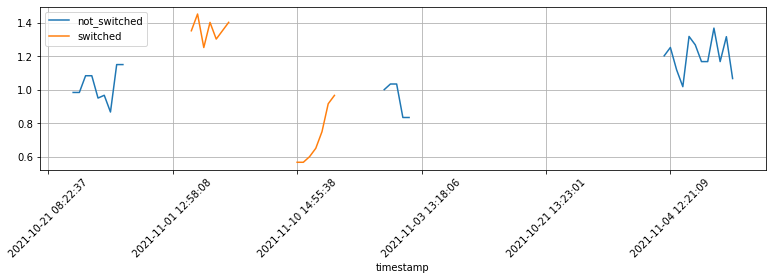

In [246]:
Moving_av.groupby('group')['stars'].plot(legend=True);
plt.xticks(fontsize=10,rotation=30);
plt.xticks(fontsize=10,rotation=45);
plt.grid()

plt.savefig("stars_over_time.png")

325


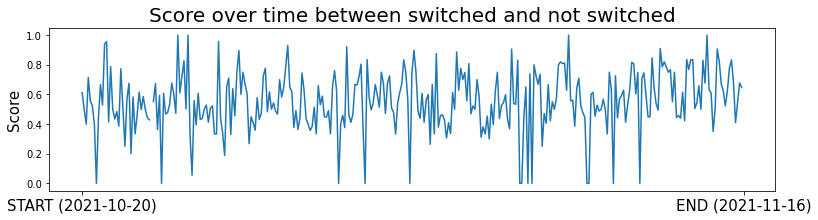

In [115]:
from scipy.interpolate import make_interp_spline

switched_vs_not_switched.sort_values('timestamp')

# x = switched_vs_not_switched['datetime']
x = switched_vs_not_switched.index
y = switched_vs_not_switched['score']

print(len(y))
plt.rcParams["figure.figsize"] = (13,3)
plt.xticks([0,325], ['START (2021-10-20)','END (2021-11-16)'],fontsize=15,rotation=0)
plt.ylabel("Score", fontsize=15)
plt.title("Score over time between switched and not switched", fontsize=20)
plt.plot(x,y)
plt.show()